# Gaussian model

- simulator taken from https://github.com/mackelab/SNL_py3port, which contains the original https://github.com/gpapamak/snl after 2to3 conversion with minimal edits (deactivating generator-internal summary stats normalization).

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import timeit

from delfi.utils.viz import plot_pdf
import delfi.inference as infer
import delfi.distribution as dd

from lfimodels.snl_exps.util import save_results, load_results
from lfimodels.snl_exps.util import init_g_gauss as init_g
from lfimodels.snl_exps.util import load_setup_gauss as load_setup
from lfimodels.snl_exps.util import load_gt_gauss as load_gt
from lfimodels.snl_exps.util import calc_all_lprob_errs


model_id = 'gauss'
save_path = 'results/' + model_id + '_box'


seeds = np.arange(50,52)

for seed in seeds:

    exp_id = 'seed'+str(seed)

    # simulation setup
    setup_dict = load_setup()
    
    
    
    setup_dict['n_null'] =  setup_dict['minibatch'] - 1
    setup_dict['n_rounds'] = 40
    
    setup_dict['lower'] = -(3 + 1e-6)
    setup_dict['upper'] =  (3 + 1e-6)
    
    
    print('upper', setup_dict['upper'])
    print('lower', setup_dict['lower'])
    
    

    pars_true, obs_stats = load_gt(generator=init_g(seed=seed))
    print('pars_true : ', pars_true)
    print('obs_stats : ', obs_stats)

    if setup_dict['train_on_all']:
        epochs=[setup_dict['epochs']//(r+1) for r in range(setup_dict['n_rounds'])]
    else:
        epochs=setup_dict['epochs']

    # control MAF seed
    rng = np.random
    rng.seed(seed)

    # generator
    g = init_g(seed=seed)

    res_C = infer.SNPEC(g,
                        obs=obs_stats,
                        n_hiddens=setup_dict['n_hiddens'],
                        seed=seed,
                        reg_lambda=setup_dict['reg_lambda'],
                        pilot_samples=setup_dict['pilot_samples'],
                        svi=setup_dict['svi'],
                        n_mades=setup_dict['n_mades'],
                        act_fun=setup_dict['act_fun'],
                        mode=setup_dict['mode'],
                        upper=setup_dict['upper'],
                        lower=setup_dict['lower'],
                        rng=rng,
                        batch_norm=setup_dict['batch_norm'],
                        verbose=setup_dict['verbose'],
                        prior_norm=setup_dict['prior_norm'])
    
    print('model class :', res_C.network)


    # train
    t = timeit.time.time()

    print('fitting model with SNPC-C')
    logs_C, tds_C, posteriors_C = res_C.run(
                        n_train=setup_dict['n_train'],
                        proposal=setup_dict['proposal'],
                        moo=setup_dict['moo'],
                        n_null = setup_dict['n_null'],
                        n_rounds=setup_dict['n_rounds'],
                        train_on_all=setup_dict['train_on_all'],
                        minibatch=setup_dict['minibatch'],
                        epochs=epochs)

    print('fitting time : ', timeit.time.time() - t)

    save_results(logs=logs_C, tds=tds_C, posteriors=posteriors_C, 
                 setup_dict=setup_dict, exp_id=exp_id, path=save_path)

    #logs, tds, posteriors, setup_dict = load_results(exp_id=exp_id, path=path)

upper 3.000001
lower -3.000001
pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]



model class : <delfi.utils.BoxConstraintConditionalAutoregressiveFlow.BoxConstraintConditionalAutoregressiveFlow object at 0x7f8a9fa30eb8>
fitting model with SNPC-C



combining data ...
n_train_round 1000



combining data ...
n_train_round 2000



combining data ...
n_train_round 3000



combining data ...
n_train_round 4000



combining data ...
n_train_round 5000



combining data ...
n_train_round 6000



combining data ...
n_train_round 7000



combining data ...
n_train_round 8000



combining data ...
n_train_round 9000



combining data ...
n_train_round 10000



combining data ...
n_train_round 11000



combining data ...
n_train_round 12000



combining data ...
n_train_round 13000



fitting time :  1158.798418045044
upper 3.000001
lower -3.000001
pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]



model class : <delfi.utils.BoxConstraintConditionalAutoregressiveFlow.BoxConstraintConditionalAutoregressiveFlow object at 0x7f8b15162320>
fitting model with SNPC-C



combining data ...
n_train_round 1000



combining data ...
n_train_round 2000



combining data ...
n_train_round 3000



combining data ...
n_train_round 4000



combining data ...
n_train_round 5000



combining data ...
n_train_round 6000



combining data ...
n_train_round 7000



combining data ...
n_train_round 8000



combining data ...
n_train_round 9000



combining data ...
n_train_round 10000



combining data ...
n_train_round 11000



combining data ...
n_train_round 12000



combining data ...
n_train_round 13000



combining data ...
n_train_round 14000



fitting time :  1251.14271235466


In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import timeit

from delfi.utils.viz import plot_pdf
import delfi.inference as infer
import delfi.distribution as dd

from lfimodels.snl_exps.util import save_results, load_results
from lfimodels.snl_exps.util import init_g_gauss as init_g
from lfimodels.snl_exps.util import load_setup_gauss as load_setup
from lfimodels.snl_exps.util import load_gt_gauss as load_gt
from lfimodels.snl_exps.util import calc_all_lprob_errs


model_id = 'gauss'
save_path = 'results/' + model_id + '_box'


seeds = np.arange(42,47)

for seed in seeds:

    exp_id = 'seed'+str(seed)

    # simulation setup
    setup_dict = load_setup()
    
    
    
    setup_dict['n_null'] =  setup_dict['minibatch'] - 1
    setup_dict['n_rounds'] = 40
    
    setup_dict['lower'] = -(3 + 1e-6)
    setup_dict['upper'] =  (3 + 1e-6)
    
    
    print('upper', setup_dict['upper'])
    print('lower', setup_dict['lower'])
    
    

    pars_true, obs_stats = load_gt(generator=init_g(seed=seed))
    print('pars_true : ', pars_true)
    print('obs_stats : ', obs_stats)

    if setup_dict['train_on_all']:
        epochs=[setup_dict['epochs']//(r+1) for r in range(setup_dict['n_rounds'])]
    else:
        epochs=setup_dict['epochs']

    # control MAF seed
    rng = np.random
    rng.seed(seed)

    # generator
    g = init_g(seed=seed)

    res_C = infer.SNPEC(g,
                        obs=obs_stats,
                        n_hiddens=setup_dict['n_hiddens'],
                        seed=seed,
                        reg_lambda=setup_dict['reg_lambda'],
                        pilot_samples=setup_dict['pilot_samples'],
                        svi=setup_dict['svi'],
                        n_mades=setup_dict['n_mades'],
                        act_fun=setup_dict['act_fun'],
                        mode=setup_dict['mode'],
                        upper=setup_dict['upper'],
                        lower=setup_dict['lower'],
                        rng=rng,
                        batch_norm=setup_dict['batch_norm'],
                        verbose=setup_dict['verbose'],
                        prior_norm=setup_dict['prior_norm'])
    
    print('model class :', res_C.network)


    # train
    t = timeit.time.time()

    print('fitting model with SNPC-C')
    logs_C, tds_C, posteriors_C = res_C.run(
                        n_train=setup_dict['n_train'],
                        proposal=setup_dict['proposal'],
                        moo=setup_dict['moo'],
                        n_null = setup_dict['n_null'],
                        n_rounds=setup_dict['n_rounds'],
                        train_on_all=setup_dict['train_on_all'],
                        minibatch=setup_dict['minibatch'],
                        epochs=epochs)

    print('fitting time : ', timeit.time.time() - t)

    save_results(logs=logs_C, tds=tds_C, posteriors=posteriors_C, 
                 setup_dict=setup_dict, exp_id=exp_id, path=save_path)

    #logs, tds, posteriors, setup_dict = load_results(exp_id=exp_id, path=path)

upper 3.000001
lower -3.000001
pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]



model class : <delfi.utils.BoxConstraintConditionalAutoregressiveFlow.BoxConstraintConditionalAutoregressiveFlow object at 0x7f8aa8d8a1d0>
fitting model with SNPC-C



combining data ...
n_train_round 1000



combining data ...
n_train_round 2000



combining data ...
n_train_round 3000



combining data ...
n_train_round 4000



combining data ...
n_train_round 5000



combining data ...
n_train_round 6000



combining data ...
n_train_round 7000



combining data ...
n_train_round 8000



combining data ...
n_train_round 9000



combining data ...
n_train_round 10000



combining data ...
n_train_round 11000



combining data ...
n_train_round 12000



combining data ...
n_train_round 13000



combining data ...
n_train_round 14000



combining data ...
n_train_round 15000



combining data ...
n_train_round 16000



combining data ...
n_train_round 17000



combining data ...
n_train_round 18000



combining data ...
n_train_round 19000



combining data ...
n_train_round 20000



combining data ...
n_train_round 21000



combining data ...
n_train_round 22000



combining data ...
n_train_round 23000



combining data ...
n_train_round 24000



combining data ...
n_train_round 25000



combining data ...
n_train_round 26000



combining data ...
n_train_round 27000



combining data ...
n_train_round 28000



combining data ...
n_train_round 29000



combining data ...
n_train_round 30000



combining data ...
n_train_round 31000



fitting time :  4329.216449975967
upper 3.000001
lower -3.000001
pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]



model class : <delfi.utils.BoxConstraintConditionalAutoregressiveFlow.BoxConstraintConditionalAutoregressiveFlow object at 0x7f8aeeeb0eb8>
fitting model with SNPC-C



combining data ...
n_train_round 1000



combining data ...
n_train_round 2000



combining data ...
n_train_round 3000



combining data ...
n_train_round 4000



combining data ...
n_train_round 5000



combining data ...
n_train_round 6000



combining data ...
n_train_round 7000



combining data ...
n_train_round 8000



fitting time :  1110.879393339157
upper 3.000001
lower -3.000001
pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]



model class : <delfi.utils.BoxConstraintConditionalAutoregressiveFlow.BoxConstraintConditionalAutoregressiveFlow object at 0x7f8b3bc720f0>
fitting model with SNPC-C



combining data ...
n_train_round 1000



combining data ...
n_train_round 2000



combining data ...
n_train_round 3000



combining data ...
n_train_round 4000



combining data ...
n_train_round 5000



combining data ...
n_train_round 6000



combining data ...
n_train_round 7000



combining data ...
n_train_round 8000



combining data ...
n_train_round 9000



combining data ...
n_train_round 10000



combining data ...
n_train_round 11000



combining data ...
n_train_round 12000



combining data ...
n_train_round 13000



combining data ...
n_train_round 14000



combining data ...
n_train_round 15000



combining data ...
n_train_round 16000



combining data ...
n_train_round 17000



combining data ...
n_train_round 18000



combining data ...
n_train_round 19000



combining data ...
n_train_round 20000



combining data ...
n_train_round 21000



combining data ...
n_train_round 22000



combining data ...
n_train_round 23000



combining data ...
n_train_round 24000



combining data ...
n_train_round 25000



combining data ...
n_train_round 26000



combining data ...
n_train_round 27000



combining data ...
n_train_round 28000



combining data ...
n_train_round 29000



combining data ...
n_train_round 30000



combining data ...
n_train_round 31000



combining data ...
n_train_round 32000



combining data ...
n_train_round 33000



combining data ...
n_train_round 34000



combining data ...
n_train_round 35000



combining data ...
n_train_round 36000



combining data ...
n_train_round 37000



combining data ...
n_train_round 38000



combining data ...
n_train_round 39000



combining data ...
n_train_round 40000
fitting time :  5568.714804172516
upper 3.000001
lower -3.000001
pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]



model class : <delfi.utils.BoxConstraintConditionalAutoregressiveFlow.BoxConstraintConditionalAutoregressiveFlow object at 0x7f8a9fbfee80>
fitting model with SNPC-C



combining data ...
n_train_round 1000



combining data ...
n_train_round 2000



combining data ...
n_train_round 3000



combining data ...
n_train_round 4000



combining data ...
n_train_round 5000



combining data ...
n_train_round 6000



combining data ...
n_train_round 7000



combining data ...
n_train_round 8000



combining data ...
n_train_round 9000



combining data ...
n_train_round 10000



combining data ...
n_train_round 11000



combining data ...
n_train_round 12000



combining data ...
n_train_round 13000



combining data ...
n_train_round 14000



combining data ...
n_train_round 15000



combining data ...
n_train_round 16000



combining data ...
n_train_round 17000



combining data ...
n_train_round 18000



combining data ...
n_train_round 19000



combining data ...
n_train_round 20000



combining data ...
n_train_round 21000



combining data ...
n_train_round 22000



combining data ...
n_train_round 23000



fitting time :  3274.5787947177887
upper 3.000001
lower -3.000001
pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]



model class : <delfi.utils.BoxConstraintConditionalAutoregressiveFlow.BoxConstraintConditionalAutoregressiveFlow object at 0x7f8aee885e10>
fitting model with SNPC-C



combining data ...
n_train_round 1000



combining data ...
n_train_round 2000



combining data ...
n_train_round 3000



combining data ...
n_train_round 4000



combining data ...
n_train_round 5000



combining data ...
n_train_round 6000



combining data ...
n_train_round 7000



combining data ...
n_train_round 8000



combining data ...
n_train_round 9000



combining data ...
n_train_round 10000



combining data ...
n_train_round 11000



combining data ...
n_train_round 12000



combining data ...
n_train_round 13000



combining data ...
n_train_round 14000



combining data ...
n_train_round 15000



combining data ...
n_train_round 16000



combining data ...
n_train_round 17000



combining data ...
n_train_round 18000



combining data ...
n_train_round 19000



combining data ...
n_train_round 20000



combining data ...
n_train_round 21000



combining data ...
n_train_round 22000



combining data ...
n_train_round 23000



combining data ...
n_train_round 24000



combining data ...
n_train_round 25000



combining data ...
n_train_round 26000



combining data ...
n_train_round 27000



combining data ...
n_train_round 28000



combining data ...
n_train_round 29000



combining data ...
n_train_round 30000



combining data ...
n_train_round 31000



combining data ...
n_train_round 32000



combining data ...
n_train_round 33000



combining data ...
n_train_round 34000



combining data ...
n_train_round 35000



combining data ...
n_train_round 36000



combining data ...
n_train_round 37000



combining data ...
n_train_round 38000



combining data ...
n_train_round 39000



combining data ...
n_train_round 40000
fitting time :  5591.606423139572


In [4]:
import numpy as np
from matplotlib import pyplot as plt
import timeit
import os

from delfi.utils.viz import plot_pdf
import delfi.inference as infer
import delfi.distribution as dd

from lfimodels.snl_exps.util import save_results, load_results
from lfimodels.snl_exps.util import calc_all_lprob_errs

import snl.inference.diagnostics.two_sample as two_sample
from snl.util import math

fig_path = 'results/'


def draw_sample_uniform_prior_33(post, n_samples, batch=None):
    
    batch = n_samples if batch is None else None
    n_drawn, samples, ct = 0, [], 0
    while n_drawn < n_samples:
        minibatch = post.gen(batch)
        idx = np.where(np.prod(np.abs(minibatch)<3.,axis=1))[0]
        samples.append(minibatch[idx])
        n_drawn += idx.size
        
        ct += 1        
    print('sampling, (itercount, n_drawn) = ', (ct,n_drawn))
    return np.concatenate(samples, axis=0)[:n_samples]


def calc_all_mmds(samples_true, n_samples, posteriors, init_g, rej=True):

    all_mmds = []
    ct = 0
    for proposal in posteriors:
        
        ct += 1
        
        print('\n round #' + str(ct) + '/' + str(len(posteriors)))
        print('- sampling')
        if rej:
            samples = draw_sample_uniform_prior_33(proposal, n_samples)
        else:
            samples = proposal.gen(n_samples)

        print('- computing MMD')
        scale = math.median_distance(samples_true)
        mmd = two_sample.sq_maximum_mean_discrepancy(samples, samples_true, scale=scale).flatten()
        all_mmds.append(mmd)
        

    return np.array(all_mmds).flatten()



def run_mmd_plots(seed, model_id, save_path, exp_id, fig_path, N):

    model_id = 'gauss'
    from lfimodels.snl_exps.util import load_setup_gauss as load_setup
    from lfimodels.snl_exps.util import load_gt_gauss as load_gt
    from lfimodels.snl_exps.util import init_g_gauss as init_g
    
    # simulation setup
    setup_dict = load_setup()

    pars_true, obs_stats = load_gt(generator=init_g(seed=seed))
    print('pars_true : ', pars_true)
    print('obs_stats : ', obs_stats)

    logs, tds, posteriors, setup_dict = load_results(exp_id=exp_id, path=save_path)
    setup_dict = setup_dict[()]


    # mmd figure 
    dir = os.path.join(save_path, exp_id)
    if not os.path.exists(dir):
        os.makedirs(dir)
    samples_true = np.load(os.path.join('results/gauss', exp_id, 'samples.npy'))
    all_mmds = calc_all_mmds(samples_true, 
                             n_samples=N, 
                             posteriors=posteriors, 
                             init_g=init_g,
                             rej=True)
    
    np.save(os.path.join(save_path, exp_id, 'all_mmds_N' + str(N)), 
            all_mmds)
        
    try:

        plt.figure(figsize=(8,5))
        plt.semilogx(np.arange(1, all_mmds.size+1,1) * setup_dict['n_train'], all_mmds, 'kd:')
        plt.xlim([0.6*setup_dict['n_train'], (setup_dict['n_rounds']+2)*setup_dict['n_train']])
        plt.xlabel('Number of simulations (log scale)')
        plt.ylabel('maximum mean discrepancy')
        plt.savefig(fig_path + model_id + '_snpec_maf_n_null_' + str(setup_dict['n_null']) + '_N' + str(N) +'_mmds.pdf')
        plt.show()
    except:
        print('plotting failed')


In [22]:
seed = 45
exp_id = 'seed'+str(seed)        

logs, tds, posteriors, setup_dict = load_results(exp_id=exp_id, path=save_path)

samples = posteriors[-4].gen(5000)
samples, len(posteriors)

(array([[-1.0343386 ,  2.907579  , -0.28300524, -2.99337   , -2.3917892 ],
        [-1.2709085 , -2.5429077 , -0.8814261 ,  0.9509418 , -1.1993737 ],
        [-0.85591793, -2.4630485 , -0.5630028 , -0.7703402 , -2.293843  ],
        ...,
        [ 0.83318067,  2.9722733 , -0.37700152, -1.165493  , -0.53524685],
        [-0.9519806 , -2.3806715 ,  0.46691585,  0.5691943 , -1.7887131 ],
        [-0.13283181, -1.4106741 , -0.4781108 ,  0.4311831 ,  0.91319776]],
       dtype=float32), 23)

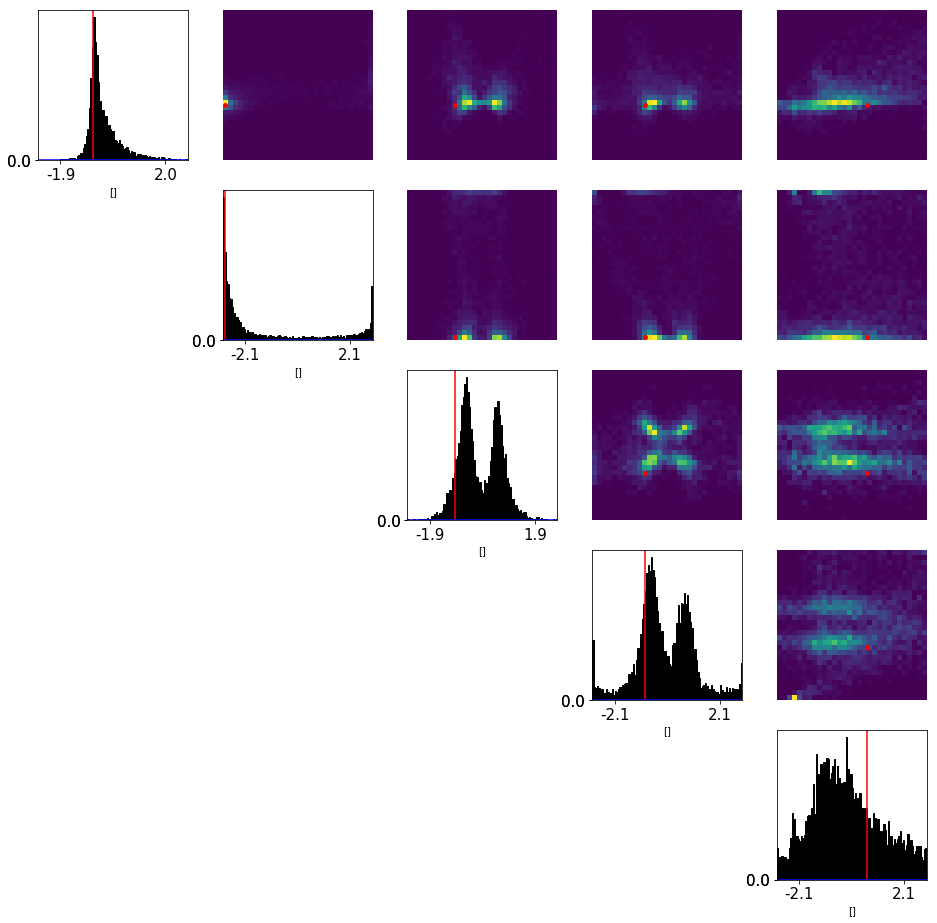

In [23]:
fig,_ = plot_pdf(dd.Gaussian(m=0.00000123*np.ones(pars_true.size), S=1e-30*np.eye(pars_true.size)), 
               samples=samples.T,
               gt=pars_true, 
               #lims=[[-3,3],[-3,3],[-3,3],[-3,3],[-3,3]],
               #lims=[0,10],
               resolution=100,
               ticks=True,
               figsize=(16,16));

In [5]:
model_id = 'gauss'
seeds = np.arange(42,52)
N = 5000

#save_path = 'results/' + model_id
save_path = 'results/' + model_id + '_box'

for seed in seeds:
    exp_id = 'seed'+str(seed)        
    run_mmd_plots(seed=seed, model_id=model_id, save_path=save_path, exp_id=exp_id, fig_path=fig_path, N=N)

pars_true :  [-0.7 -2.9 -1.  -0.9  0.6]
obs_stats :  [[-0.97071232 -2.94612244 -0.44947218 -3.42318484 -0.13285634 -3.36401699
  -0.85367595 -2.42716377]]

 round #1/31
- sampling
sampling, (itercount, n_drawn) =  (1, 5000)
- computing MMD

 round #2/31
- sampling
sampling, (itercount, n_drawn) =  (1, 5000)
- computing MMD

 round #3/31
- sampling
sampling, (itercount, n_drawn) =  (1, 5000)
- computing MMD

 round #4/31
- sampling
sampling, (itercount, n_drawn) =  (2, 9999)
- computing MMD

 round #5/31
- sampling
sampling, (itercount, n_drawn) =  (1, 5000)
- computing MMD

 round #6/31
- sampling
sampling, (itercount, n_drawn) =  (1, 5000)
- computing MMD

 round #7/31
- sampling
sampling, (itercount, n_drawn) =  (1, 5000)
- computing MMD

 round #8/31
- sampling
sampling, (itercount, n_drawn) =  (1, 5000)
- computing MMD

 round #9/31
- sampling
sampling, (itercount, n_drawn) =  (2, 9999)
- computing MMD

 round #10/31
- sampling
sampling, (itercount, n_drawn) =  (1, 5000)
- computin

KeyboardInterrupt: 